574838074.0
705192804.0
221113978.0
62683732.0
21712379.0
70901600.0
124220083.0
93727521.0
84105797.0
469137919.0
245779413.0
42265051.0
22582988.0
249438829.0
732984481.0
72735020.0
200436631.0
37521356.0
25769564.0
470355584.0
166418822.0
578784525.0
1389769736.0
207335032.0


c:\users\mike4\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\mike4\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\mike4\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\mike4\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\mike4\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s

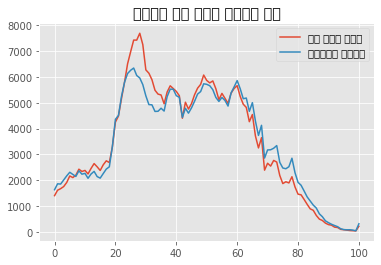

In [198]:
import matplotlib.pyplot as plt
import numpy as np
import csv

f= open('seoulperson.csv','r',encoding='cp949')
data = csv.reader(f)
header = next(data)                   

location = header.index('행정기관')  
result=np.zeros(101) 
compare=[]
cmpnum=0
locationname=[]

for row in data:
    row[location]=row[location].strip()
    if row[location]=='서울특별시 광진구':
        for i in range(0,100):
            a= str(i)+"세"
            result[i]=result[i]+int(row[header.index(a)].replace(',',''));
        result[100]=result[100]+int(row[header.index("100세 이상")]);
    else:
        compare.append([]) 
        for i in range(0,100):
            a= str(i)+"세"
            compare[cmpnum].append(int(row[header.index(a)].replace(',',''))); 
        compare[cmpnum].append(int(row[header.index("100세 이상")].replace(',','')));
        cmpnum+=1
        locationname.append(row[location])
cmpresult = np.array(compare)  

minv = 9999999999;
tempindex=0;
for i in range(1,len(cmpresult)): 
    temp = (result-cmpresult[i])**2
    onetemp = np.ones(len(temp))
    plus = np.dot(temp,onetemp.T)
    print(plus)
    if minv>plus:
        minv = plus
        tempindex=i;
    
plt.style.use('ggplot')
plt.title('광진구와 가장 비슷한 인구구조 지역')
plt.plot(result,label="서울 특별시 광진구")
plt.plot(cmpresult[tempindex],label=locationname[tempindex])
plt.legend()
plt.show()